<a href="https://colab.research.google.com/github/harshaharod21/Clustering-Algorithm/blob/main/k_means_Agglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px





In [ ]:
!pip install -U kaleido
import kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("/content/RTYB201920_A3_3c_0.csv")


In [ ]:
df.head()

,States/Union Territories,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII),Total Transport (I TO VII)
0,Andhra Pradesh,10332.00,211090.00,186730.00,99650.00,20890.00,7246.00,2343.00,28820.00,53568.00,26493.00,19797.00,0.00,619962.00,703.00,340010.00,1627634.00
1,Arunachal Pradesh,1544.00,6367.00,7292.00,2566.00,681.00,6677.00,1189.00,733.00,85.00,1015.00,65.00,7010.00,4272.00,0.00,0.00,39496.00
2,Assam,9225.00,147374.00,157201.00,50119.00,2105.00,17029.00,0.00,4472.00,21097.00,9647.00,47933.00,137189.00,0.00,0.00,0.00,603391.00
3,Bihar,14915.00,126414.00,87632.00,43021.00,43875.00,0.00,0.00,0.00,112726.00,0.00,0.00,399096.00,0.00,0.00,0.00,827679.00
4,Chhattisgarh,38099.00,120980.00,98473.00,20573.00,7321.00,1460.00,7640.00,3306.00,20963.00,877.00,0.00,46768.00,6072.00,0.00,0.00,372532.00


In [ ]:
df.describe()

,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII),Total Transport (I TO VII)
count,36.00,36.00,36.00,36.00,36.00,35.00,35.00,35.00,36.00,35.00,35.00,36.00,36.00,36.00,36.00,36.00
mean,90699.67,323692.83,260964.00,118435.78,54647.89,19377.83,7643.09,15251.14,131333.17,53535.60,9031.26,333766.50,121955.17,3020.67,24164.50,1564606.89
std,301335.17,961466.66,782684.08,361328.82,166253.19,58680.31,23419.46,47266.57,390746.50,164036.36,28141.21,1006552.50,391229.08,10503.41,91297.87,4647381.57
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,85.00,0.00,0.00,0.00,0.00,0.00,0.00,2594.00
25%,1.50,10684.75,9692.00,55.50,2132.75,0.00,0.00,0.00,8668.75,348.50,0.00,6423.00,0.00,0.00,0.00,76882.00
50%,1510.50,123697.00,52491.00,6611.50,15771.00,1323.00,144.00,47.00,43200.00,3619.00,28.00,40646.50,819.50,0.00,0.00,521818.00
75%,43748.50,261662.00,192204.50,94671.50,35180.00,12781.50,4346.00,5878.00,108250.00,32386.00,2880.00,252175.25,17534.50,332.25,0.00,1424885.75
max,1632594.00,5826471.00,4697352.00,2131844.00,983662.00,339112.00,133754.00,266895.00,2363997.00,936873.00,158047.00,6007797.00,2195193.00,54372.00,434961.00,28162924.00


In [ ]:
df = df.drop(32)

In [ ]:
df=df.drop(36)

In [ ]:
df = df.drop(columns=['Total Transport (I TO VII)'])

In [ ]:
df_copy1=df.copy()
col = list(df_copy1.columns)
col.remove('States/Union Territories')
numerical_features = [*col]

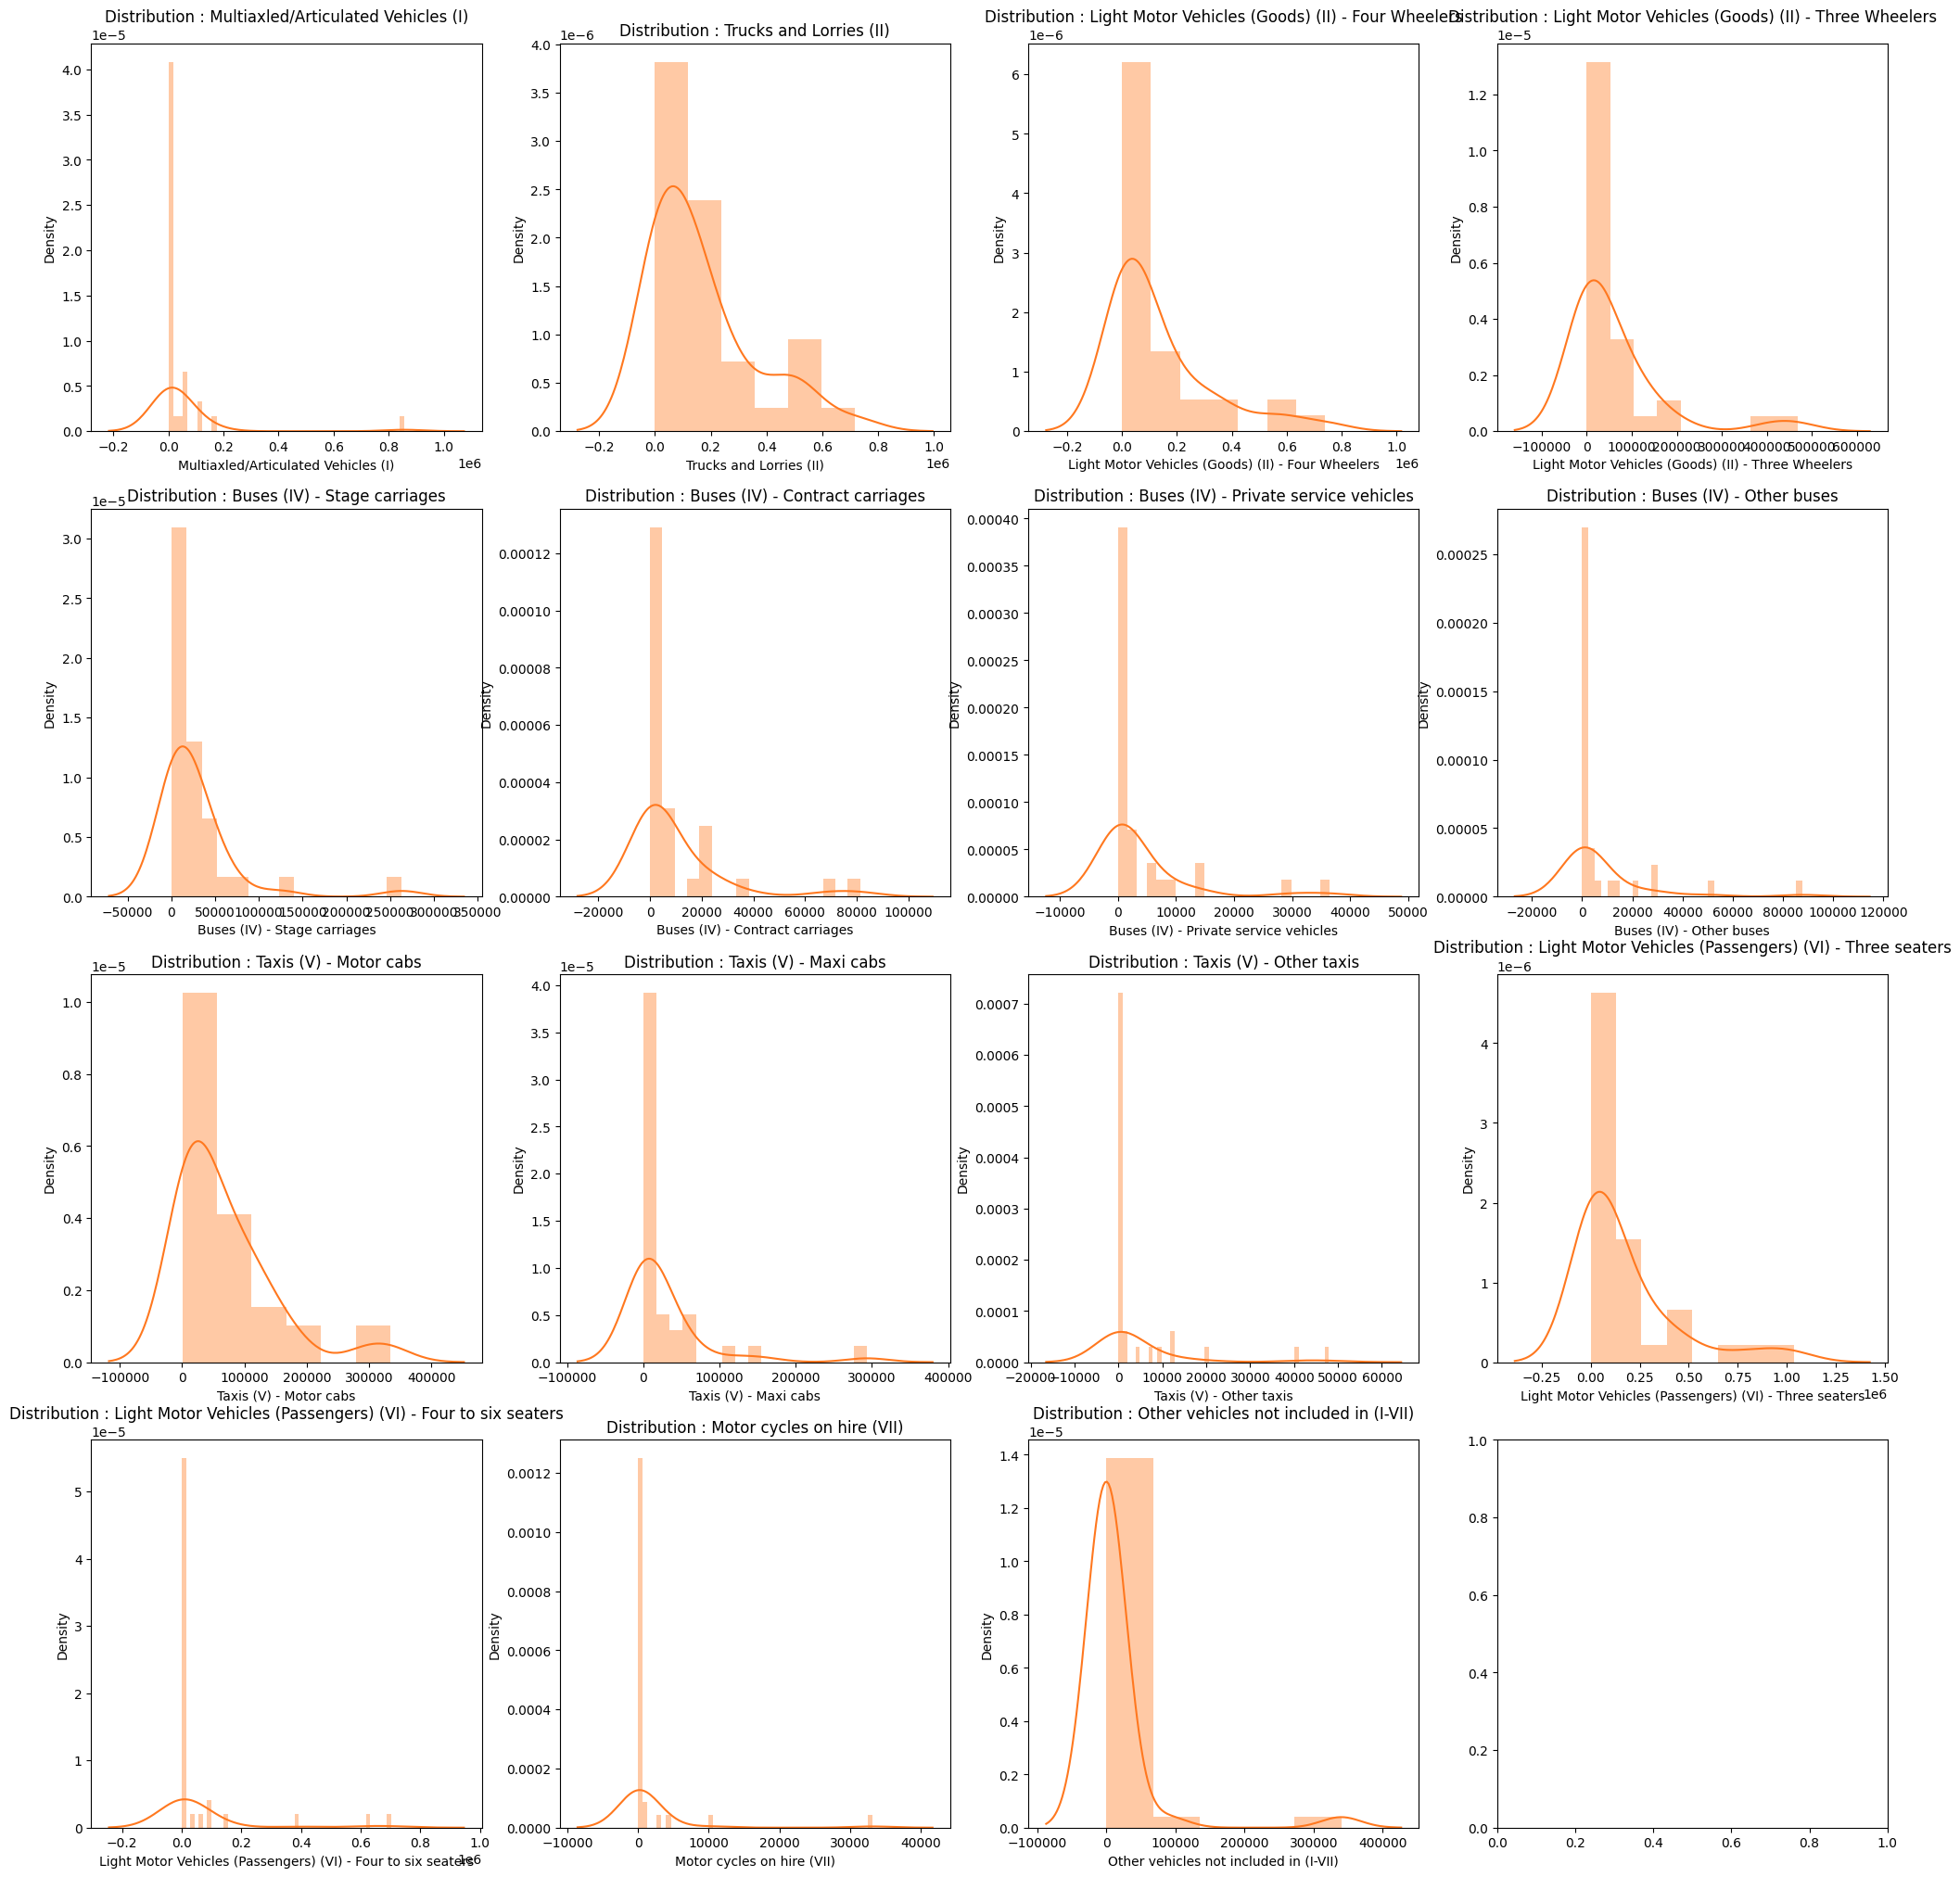

In [ ]:
#Visualize the dataset
colors = ['#FF781F','#2D2926']

fig, ax = plt.subplots(nrows = 4,ncols = 4,figsize = (25,25))
for i in range(len(numerical_features)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_copy1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

In [ ]:
df_copy1.fillna(0, inplace=True)

Almost all the features are correlated

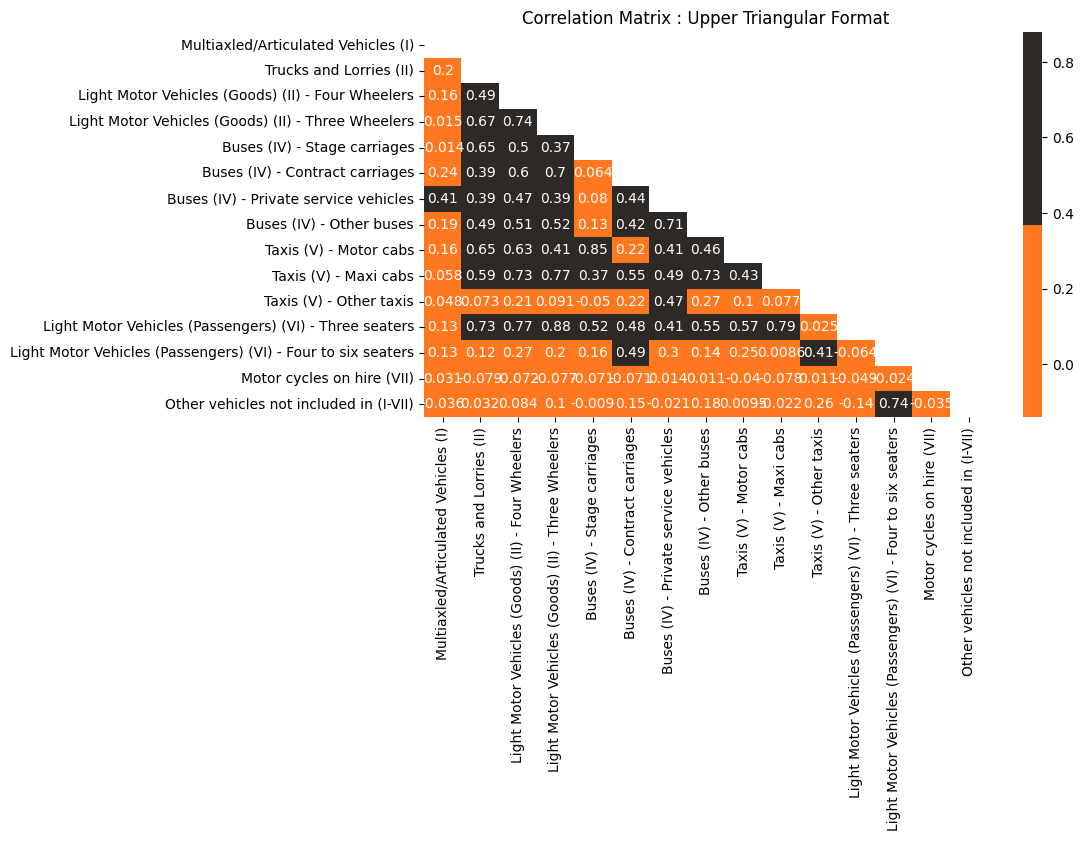

In [ ]:
# Correlation matrix

ut = np.triu(df_copy1.corr())


fig,ax = plt.subplots(nrows = 1,figsize = (20,5))
plt.subplot(1,2,1)
sns.heatmap(df_copy1.corr(),cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

### PCA

In [ ]:
# Feature scaling

from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization


In [ ]:
#We will MMS as the data is not normally distributed but highly skewed
df_copy1.drop(columns = 'States/Union Territories',inplace = True)
col1 = list(df_copy1.columns)
for i in col1:
    df_copy1[i] = mms.fit_transform(df_copy1[[i]]) # Normalization

df_copy1.head()

,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII)
0,0.01,0.29,0.25,0.21,0.08,0.09,0.06,0.33,0.16,0.09,0.41,0.00,0.88,0.02,1.00
1,0.00,0.01,0.01,0.01,0.00,0.08,0.03,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00
2,0.01,0.21,0.21,0.11,0.01,0.21,0.00,0.05,0.06,0.03,1.00,0.13,0.00,0.00,0.00
3,0.02,0.18,0.12,0.09,0.17,0.00,0.00,0.00,0.34,0.00,0.00,0.39,0.00,0.00,0.00
4,0.04,0.17,0.13,0.04,0.03,0.02,0.21,0.04,0.06,0.00,0.00,0.05,0.01,0.00,0.00


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(df_copy1))
pca.explained_variance_

array([0.32370005, 0.10545057, 0.06718396, 0.05699102, 0.03630087,
       0.03201507, 0.0303573 , 0.02760381, 0.01699609, 0.01066789,
       0.00779574, 0.00545373, 0.00184295, 0.00073515, 0.00053652])

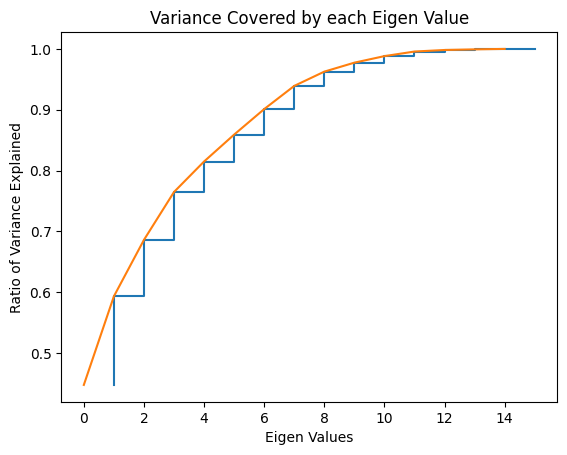

In [ ]:
plt.step(list(range(1, len(pca.explained_variance_ratio_) + 1)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [ ]:
pca_df = pca_df.drop(columns = [9,10,11,12,13,14])
pca_df.head()

,0,1,2,3,4,5,6,7,8
0,0.19,0.98,0.44,-0.32,-0.12,-0.38,0.24,-0.35,0.35
1,-0.43,-0.00,-0.12,-0.06,0.01,0.01,-0.05,-0.05,-0.05
2,-0.03,0.41,-0.17,0.19,-0.54,-0.08,-0.18,0.47,0.16
3,-0.05,-0.24,0.13,-0.00,-0.05,0.05,-0.04,0.01,0.04
4,-0.24,-0.02,-0.09,0.07,0.05,-0.01,-0.06,-0.05,-0.02


In [ ]:
m=pca_df.values

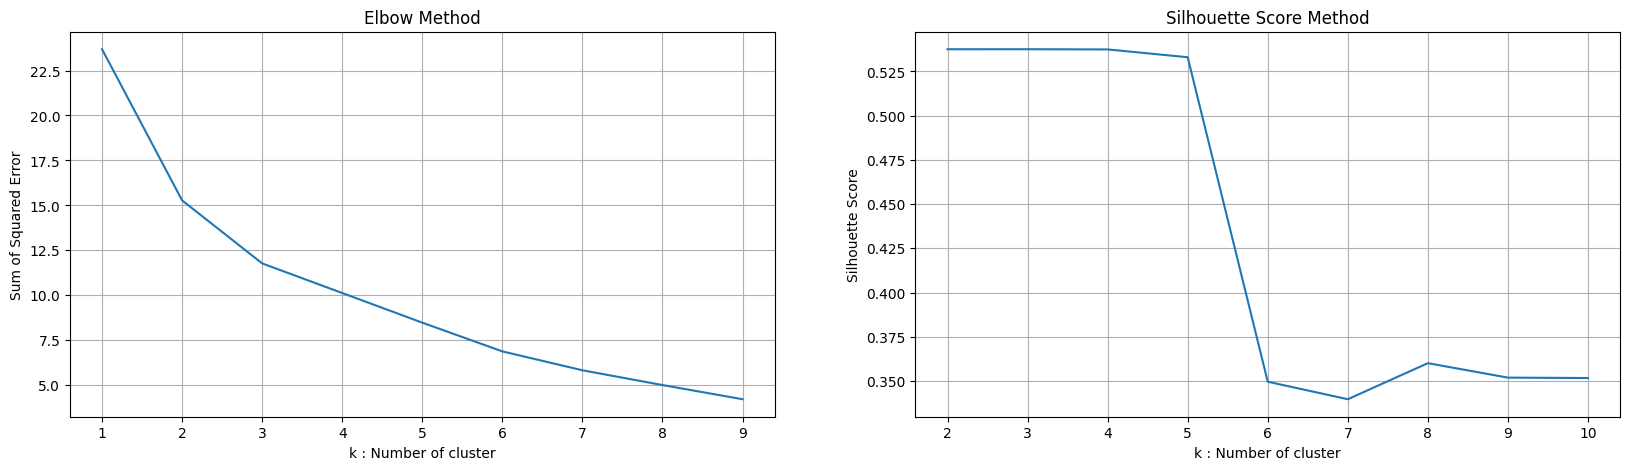

In [ ]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m)
    labels = kmeans.labels_
    sil.append(silhouette_score(m, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()


**Number of cluster: 3**


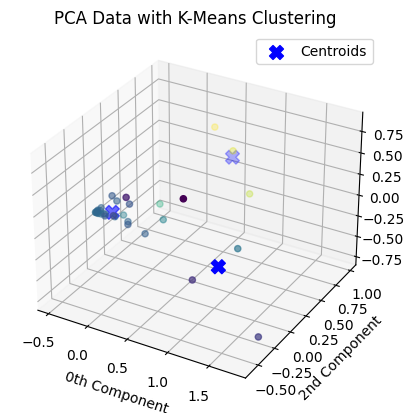

In [ ]:
model = KMeans(n_clusters=3)
model.fit(m)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df_copy1['Class'] = labels; pca_df['Class'] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extracting principal components
x = pca_df[0]
y = pca_df[1]
z = pca_df[2]


# Plotting data points
ax.scatter(x, y,z, c=y, cmap='viridis')

# Plotting centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='b', s=100, label='Centroids')

plt.title('PCA Data with K-Means Clustering')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_ylabel('2nd Component')

plt.legend()
plt.show()

In [ ]:
df['cluster'] = labels

In [ ]:
labels

array([2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

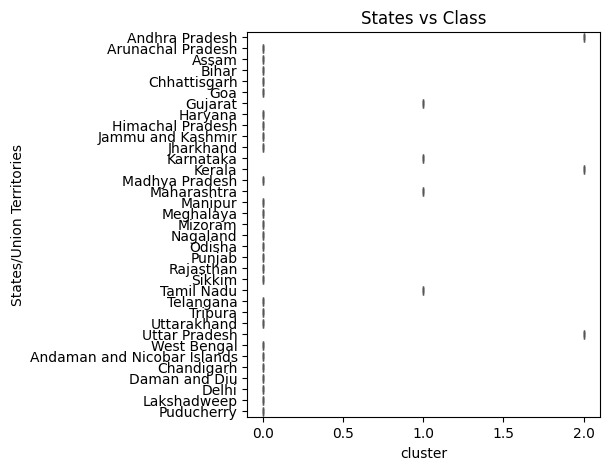

In [ ]:
fig, ax = plt.subplots(nrows = 1, figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster', y = 'States/Union Territories', data  = df, color = '#FF781F');
plt.title('States vs Class')

plt.show()

In [ ]:
df.head()

,States/Union Territories,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII),cluster
0,Andhra Pradesh,10332.00,211090.00,186730.00,99650.00,20890.00,7246.00,2343.00,28820.00,53568.00,26493.00,19797.00,0.00,619962.00,703.00,340010.00,2
1,Arunachal Pradesh,1544.00,6367.00,7292.00,2566.00,681.00,6677.00,1189.00,733.00,85.00,1015.00,65.00,7010.00,4272.00,0.00,0.00,0
2,Assam,9225.00,147374.00,157201.00,50119.00,2105.00,17029.00,0.00,4472.00,21097.00,9647.00,47933.00,137189.00,0.00,0.00,0.00,0
3,Bihar,14915.00,126414.00,87632.00,43021.00,43875.00,0.00,0.00,0.00,112726.00,0.00,0.00,399096.00,0.00,0.00,0.00,0
4,Chhattisgarh,38099.00,120980.00,98473.00,20573.00,7321.00,1460.00,7640.00,3306.00,20963.00,877.00,0.00,46768.00,6072.00,0.00,0.00,0


In [ ]:
df.columns

Index(['States/Union Territories', 'Multiaxled/Articulated Vehicles (I)',
       'Trucks and Lorries (II)',
       'Light Motor Vehicles (Goods) (II) - Four Wheelers',
       'Light Motor Vehicles (Goods) (II) - Three Wheelers',
       'Buses (IV) - Stage carriages', 'Buses (IV) - Contract carriages',
       'Buses (IV) - Private service vehicles', 'Buses (IV) - Other buses',
       'Taxis (V) - Motor cabs', 'Taxis (V) - Maxi cabs',
       'Taxis (V) - Other taxis',
       'Light Motor Vehicles (Passengers) (VI) - Three seaters',
       'Light Motor Vehicles (Passengers) (VI) - Four to six seaters',
       'Motor cycles on hire (VII)', 'Other vehicles not included in (I-VII)',
       'cluster'],
      dtype='object')

In [ ]:
cluster_dis= df.groupby('cluster')[['States/Union Territories', 'Multiaxled/Articulated Vehicles (I)',
       'Trucks and Lorries (II)',
       'Light Motor Vehicles (Goods) (II) - Four Wheelers',
       'Light Motor Vehicles (Goods) (II) - Three Wheelers',
       'Buses (IV) - Stage carriages', 'Buses (IV) - Contract carriages',
       'Buses (IV) - Private service vehicles', 'Buses (IV) - Other buses',
       'Taxis (V) - Motor cabs', 'Taxis (V) - Maxi cabs',
       'Taxis (V) - Other taxis',
       'Light Motor Vehicles (Passengers) (VI) - Three seaters',
       'Light Motor Vehicles (Passengers) (VI) - Four to six seaters',
       'Motor cycles on hire (VII)', 'Other vehicles not included in (I-VII)']].sum()

In [ ]:
cluster_dis['cluster_label']=[0,1,2]

In [ ]:
cluster_dis

,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII),cluster_label
cluster,,,,,,,,,,,,,,,,
0,1184243.00,3210266.00,1890050.00,563388.00,479209.00,100249.00,37153.00,63622.00,1254094.00,239980.00,75637.00,2553016.00,301687.00,49149.00,5936.00,0
1,205056.00,2021496.00,1954999.00,1210777.00,409556.00,127363.00,52016.00,152621.00,792046.00,617063.00,12485.00,3145842.00,179939.00,0.00,0.00,1
2,243295.00,594709.00,852303.00,357679.00,94897.00,111500.00,44585.00,50652.00,317857.00,79830.00,69925.00,308939.00,1713567.00,5223.00,429025.00,2


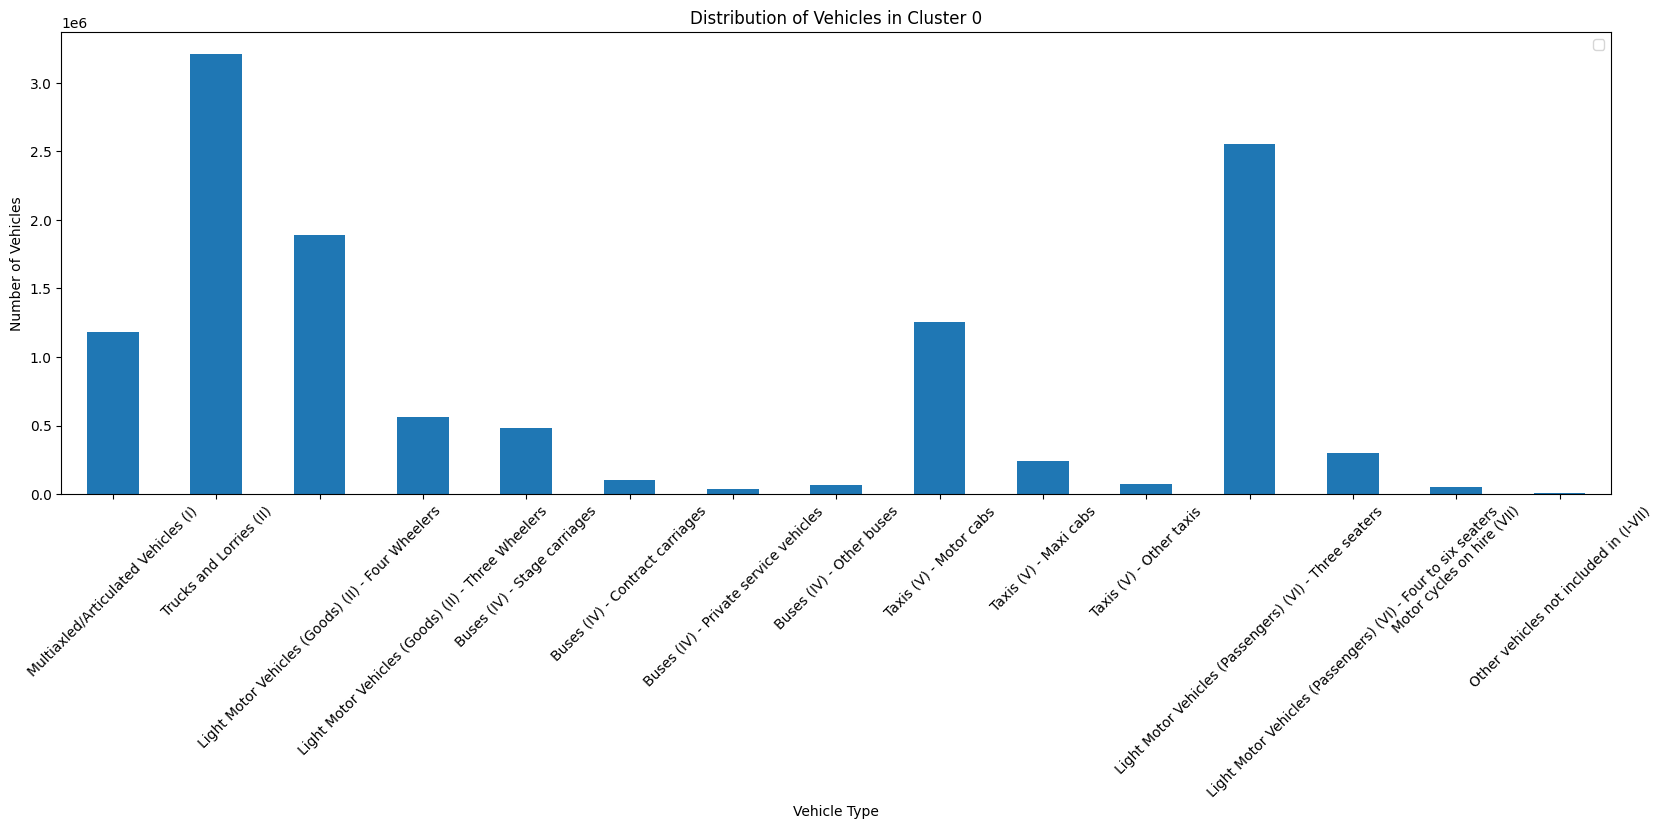

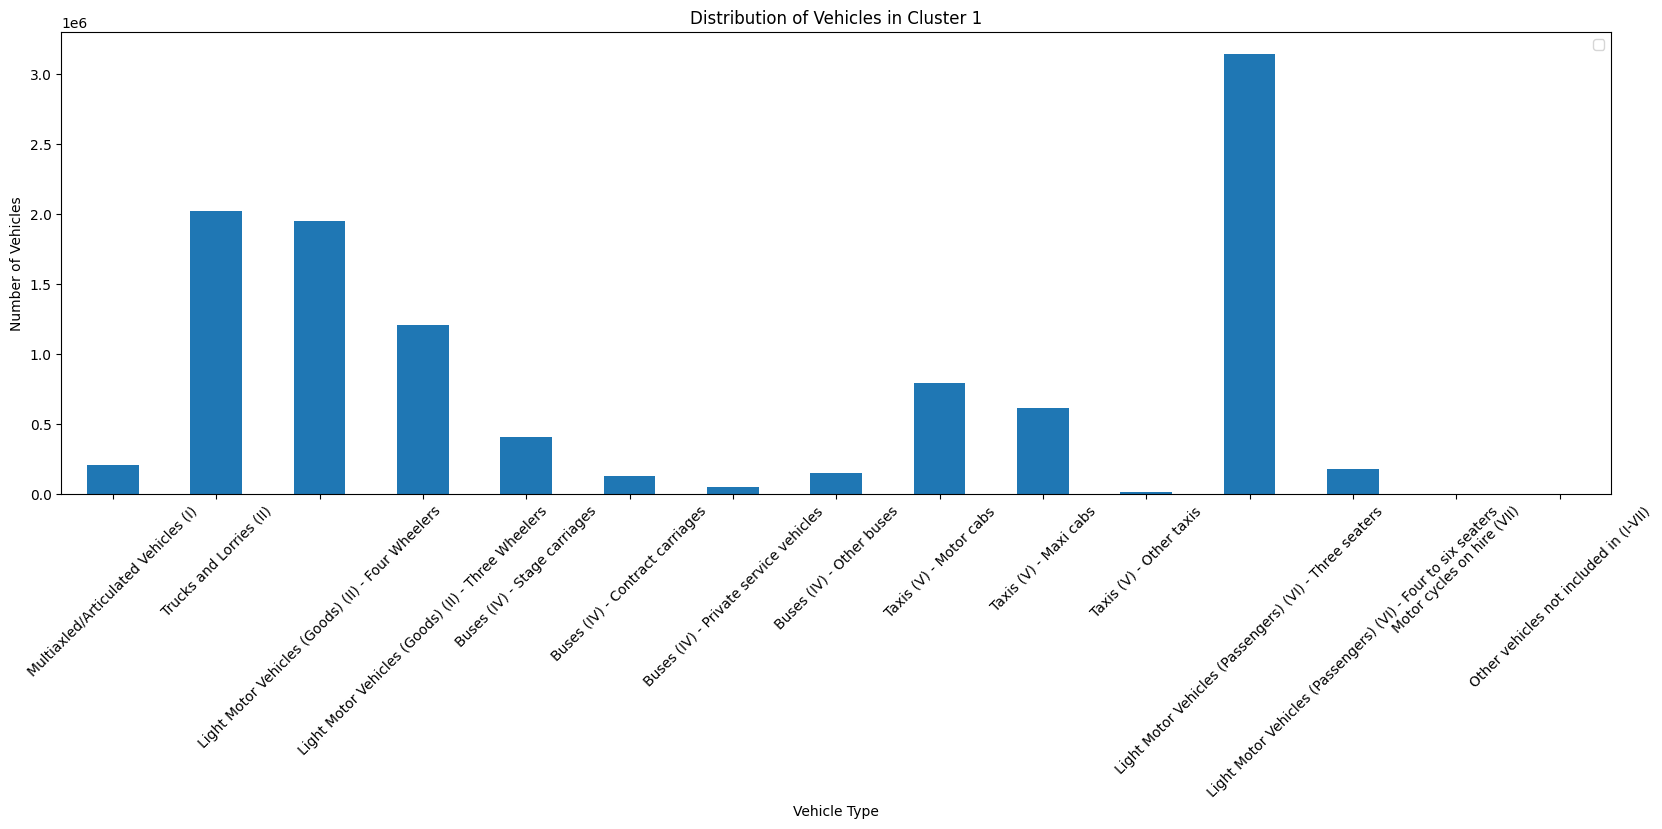

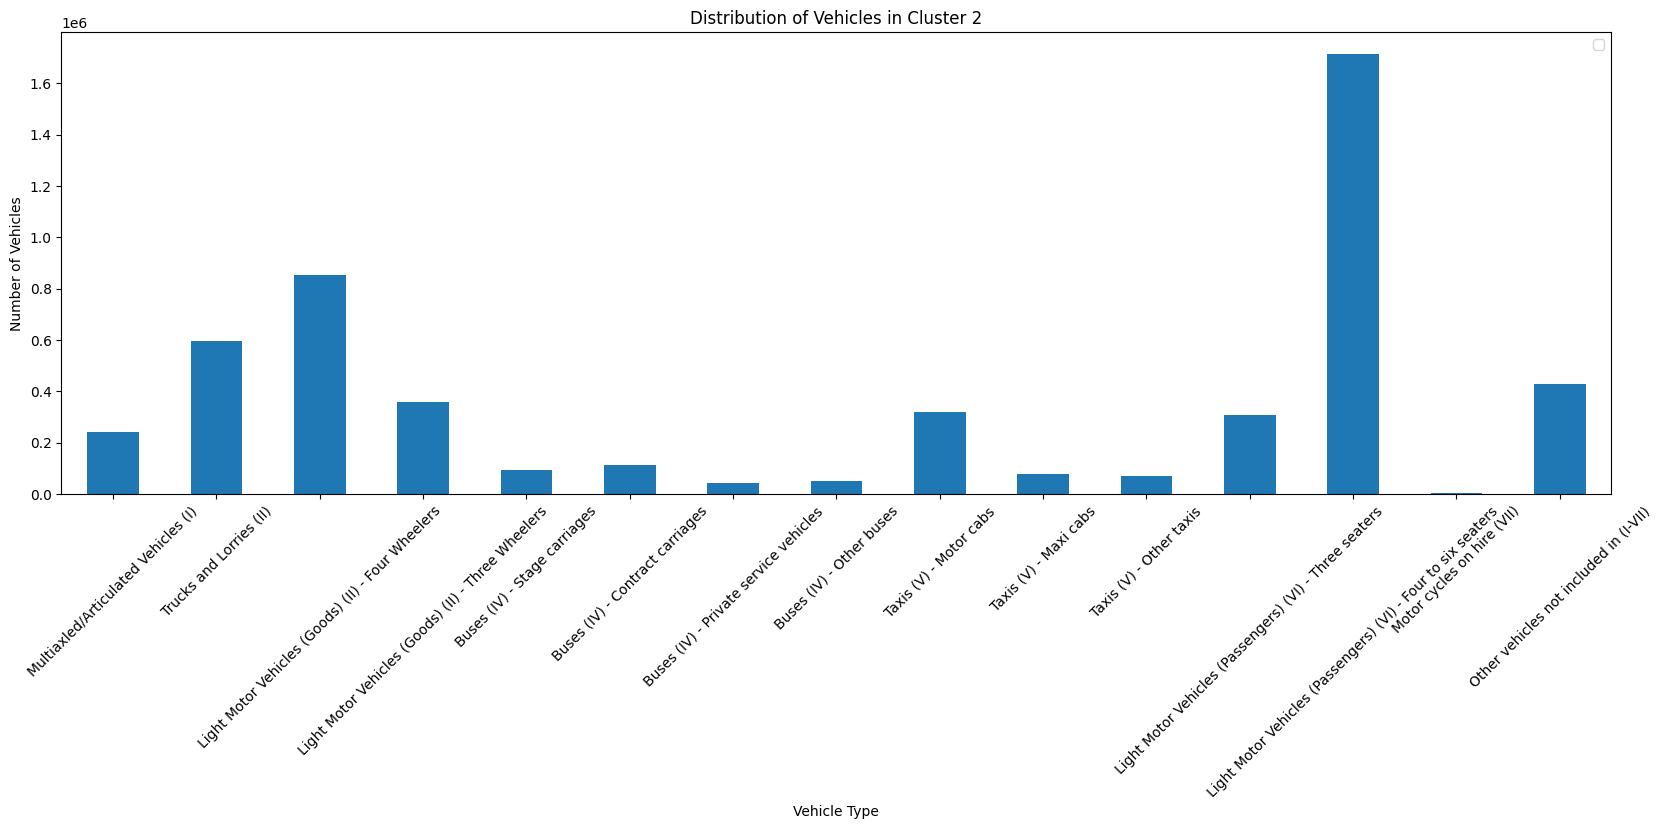

In [ ]:
for cluster_lab in range(3):
    # Filter the dataset for the current cluster
    cluster_data = cluster_dis[cluster_dis['cluster_label'] == cluster_lab]

    # Plot the frequency distribution for vehicles in the current cluster
    cluster_data.drop('cluster_label', axis=1).sum().plot(kind='bar', figsize=(20, 6))

    # Set plot labels and title
    plt.xlabel('Vehicle Type')
    plt.ylabel('Number of Vehicles')
    plt.title(f'Distribution of Vehicles in Cluster {cluster_lab}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

### Agglomerative Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

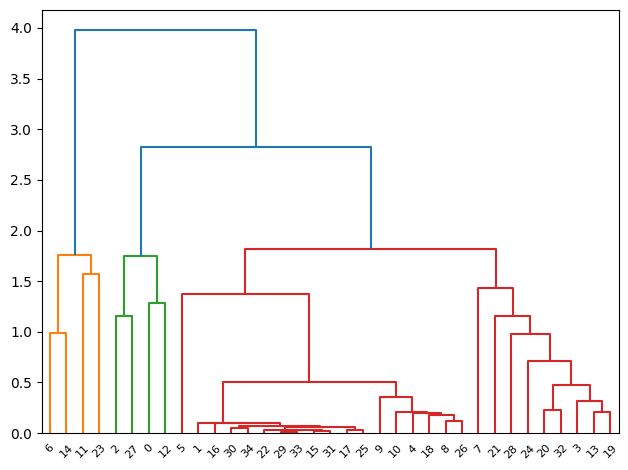

In [ ]:
linkage_data = linkage(m, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(m)

pred_agc = pd.Series(hierarchical_cluster.labels_)
df['Class'] = pred_agc; pca_df['Class'] = pred_agc

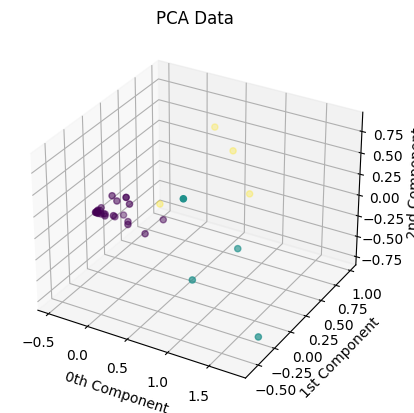

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(pca_df[0])
y = np.array(pca_df[1])
z = np.array(pca_df[2])
ax.scatter(x,y,z,c = pca_df['Class'])
plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
plt.show();

Text(0.5, 1.0, 'child_mort vs Class')

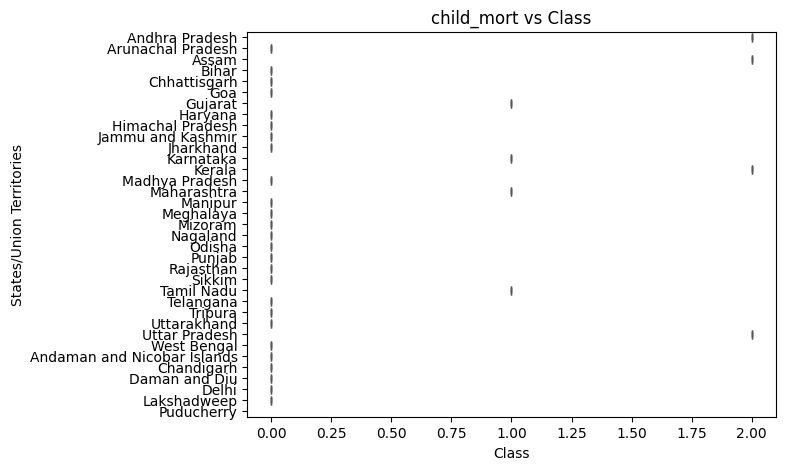

In [ ]:
fig, ax = plt.subplots(nrows = 1, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'States/Union Territories', data  = df, color = '#FF781F');
plt.title('child_mort vs Class')


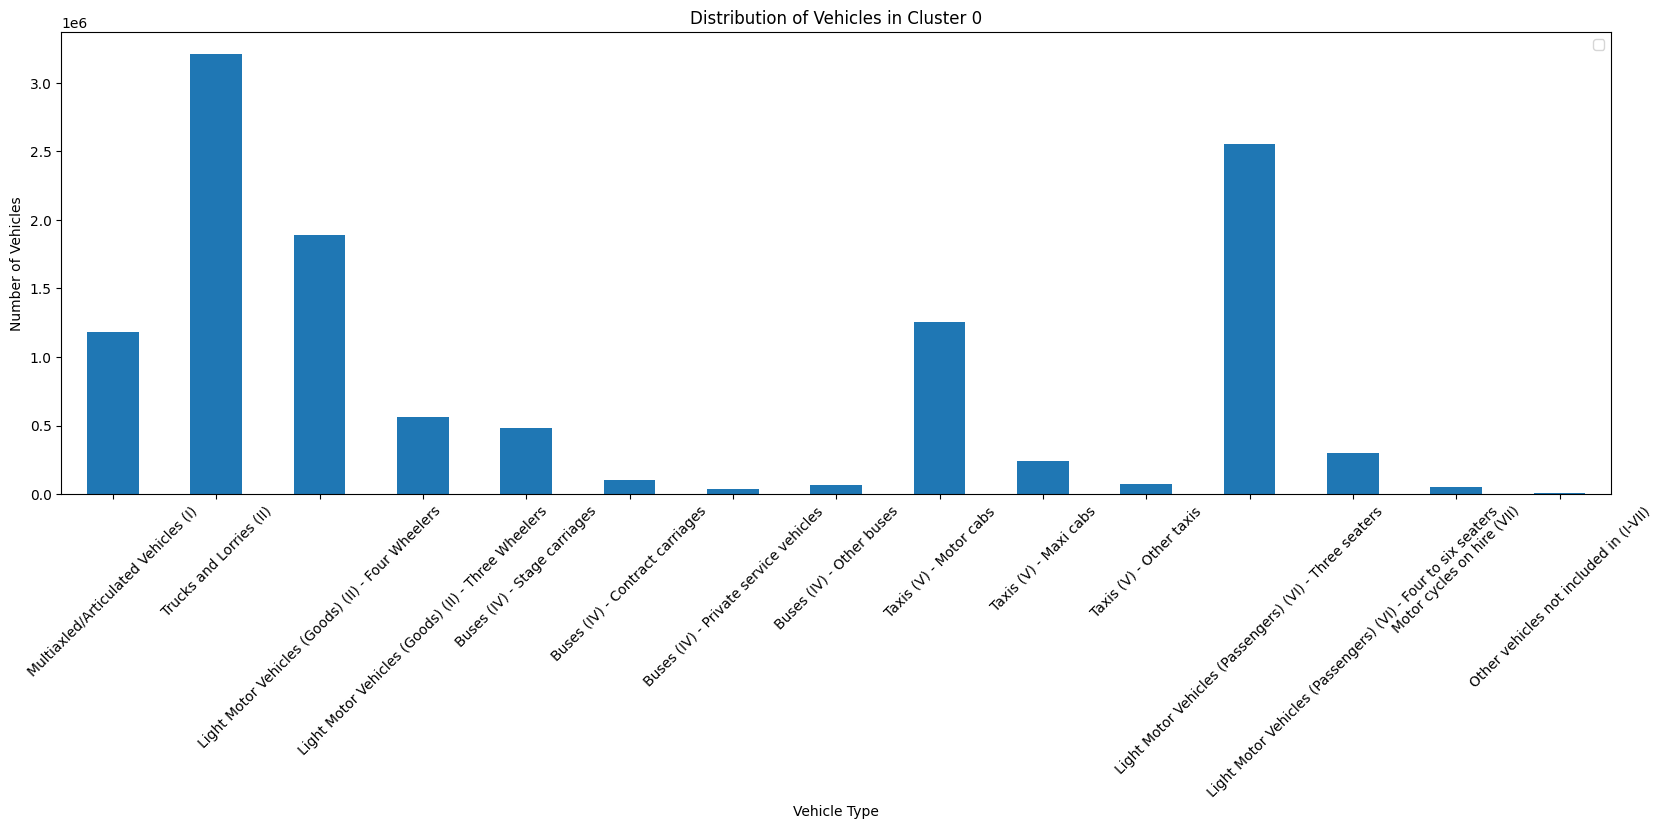

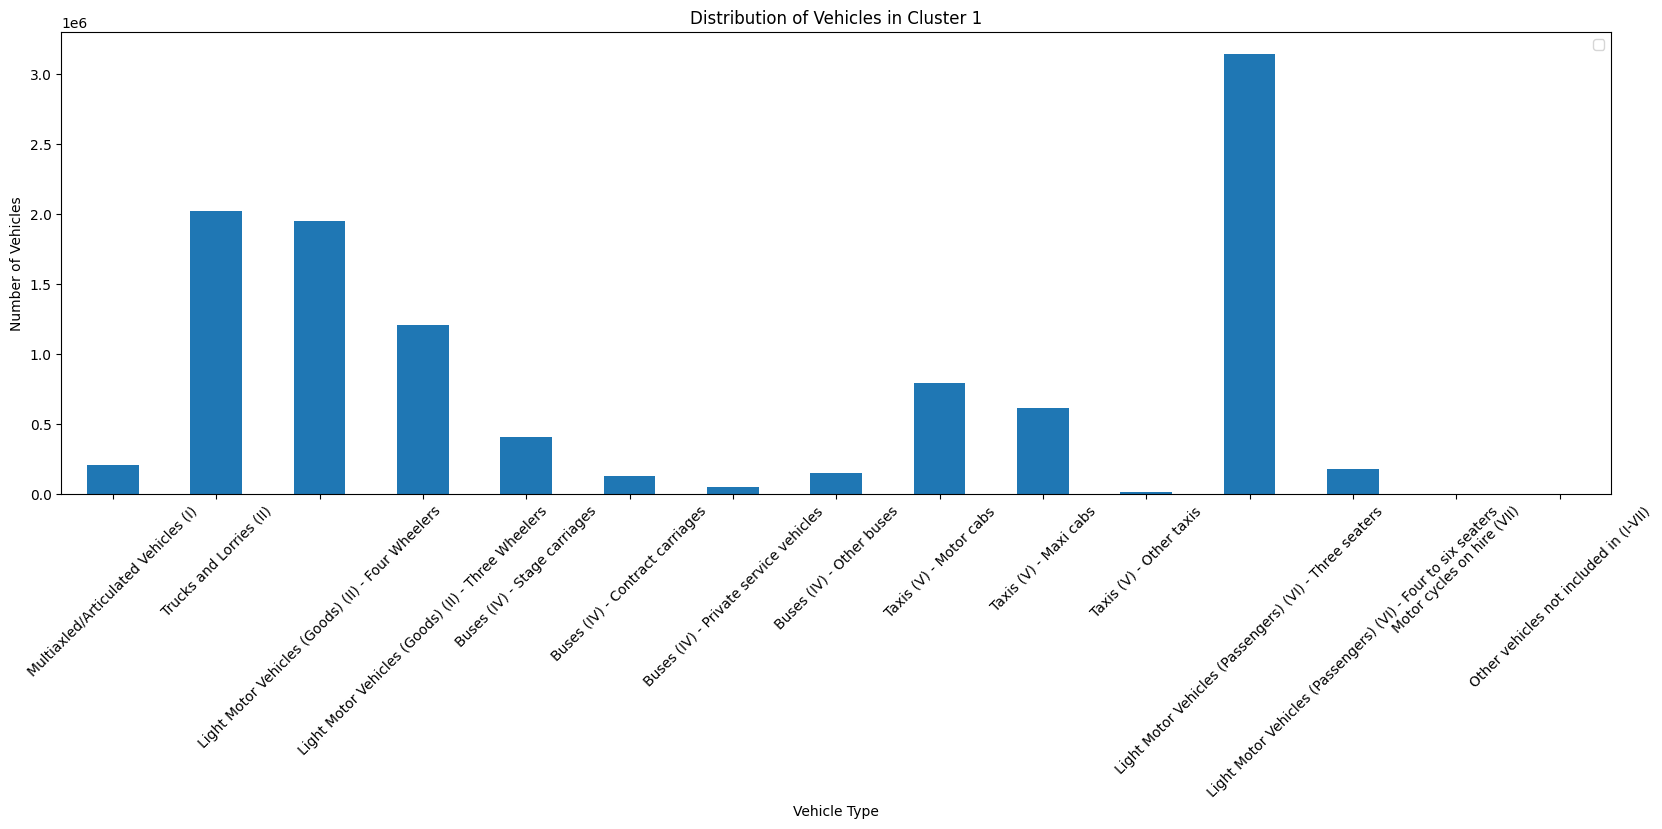

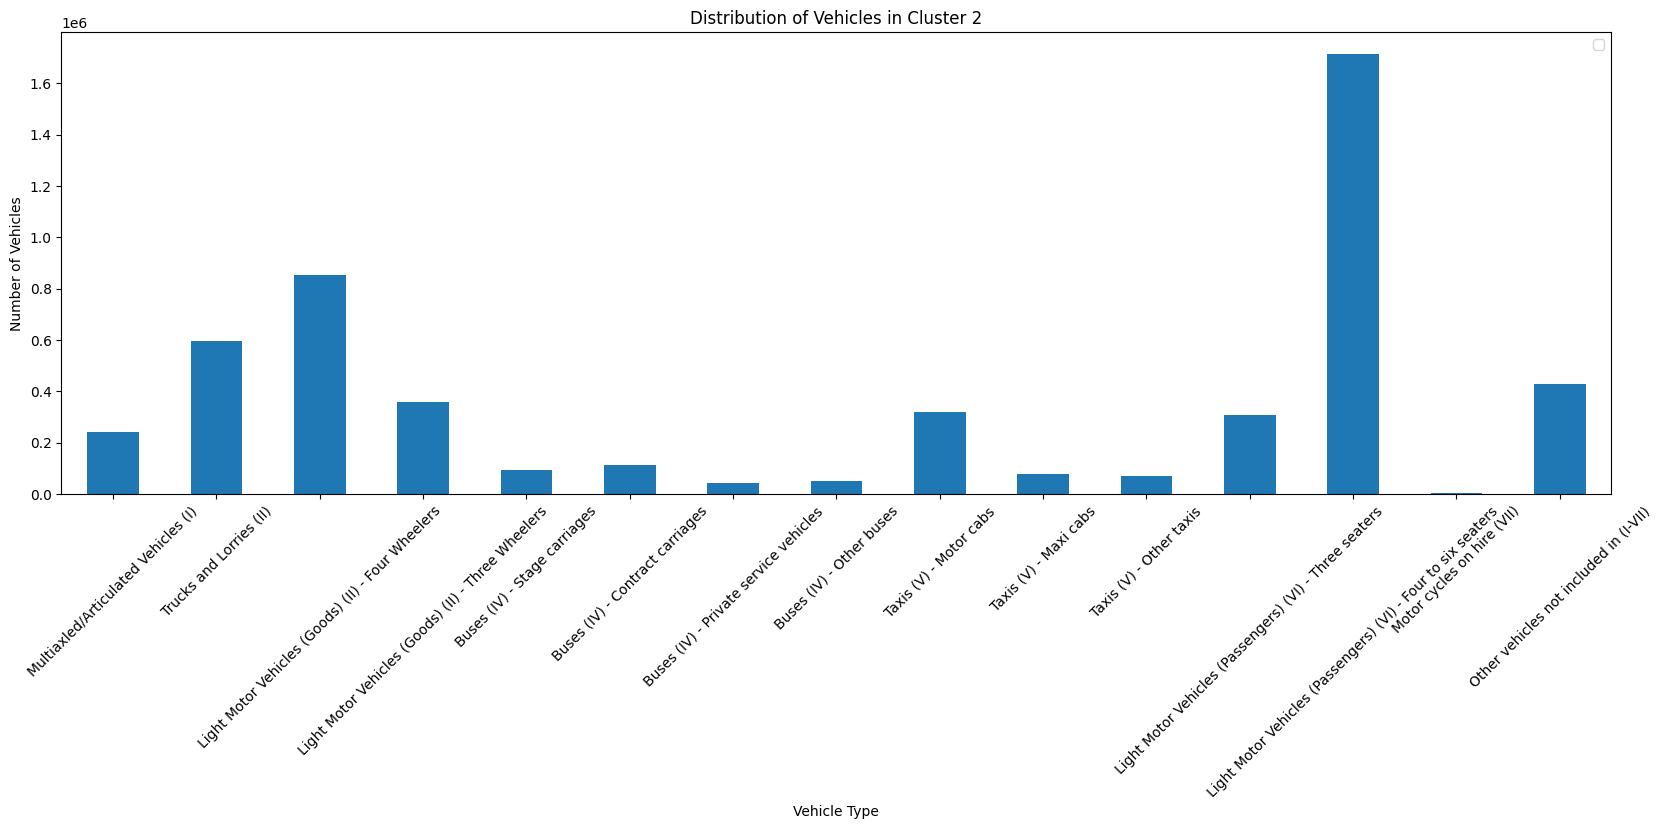

In [ ]:
for cluster_lab in range(3):
    # Filter the dataset for the current cluster
    cluster_data = cluster_dis[cluster_dis['cluster_label'] == cluster_lab]

    # Plot the frequency distribution for vehicles in the current cluster
    cluster_data.drop('cluster_label', axis=1).sum().plot(kind='bar', figsize=(20, 6))

    # Set plot labels and title
    plt.xlabel('Vehicle Type')
    plt.ylabel('Number of Vehicles')
    plt.title(f'Distribution of Vehicles in Cluster {cluster_lab}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()